## Normal toric varieties and divisors

In this notebook, we illustrate some of the functionalities of 'Oscar.jl' related to normal toric varieties and torus invariant divisors. We construct toric varieties from fans and compute Class and Picard groups. Documentation can be found at

https://oscar-system.github.io/Oscar.jl/dev/ToricVarieties/NormalToricVarieties/

https://oscar-system.github.io/Oscar.jl/dev/ToricVarieties/ToricDivisors/

In [ ]:
using Pkg; Pkg.add("Oscar")
Pkg.develop(path=raw"/Users/Telen/Documents/Projects/Oscar.jl")
using Oscar

Recall that Oscar allows to construct normal projective toric varieties from polytopes:

In [78]:
P = convex_hull([0 0; 1 0; 2 1; 2 2; 1 2; 0 1])
X = NormalToricVariety(P)

A normal toric variety corresponding to a polyhedral fan in ambient dimension 2

We can now check whether $P$ is simple, or equivalently, whether $X$ is simplicial:

In [79]:
[issimple(P) issimplicial(X)]

1×2 Matrix{Bool}:
 1  1

More general normal toric varieties arise from arbitrary polyhedral fans: 

In [80]:
R = [1 0; 1 1; 0 1]
IM = IncidenceMatrix([[1,2],[2,3]]);
Σ = PolyhedralFan(R,IM)

A polyhedral fan in ambient dimension 2

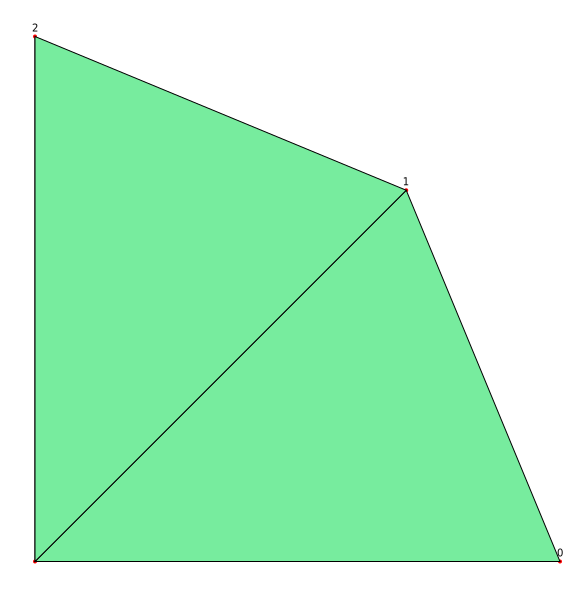

In [81]:
visualize(Σ)

This is obtained from a *star subdivision*: 

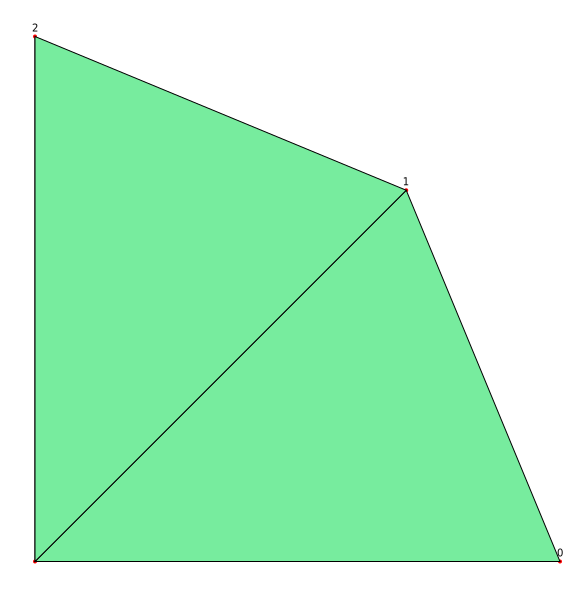

In [82]:
R = [1 0; 0 1]
IM = IncidenceMatrix([[1,2]])
Σ0 = PolyhedralFan(R,IM)
Σ = starsubdivision(Σ0,1)
visualize(Σ)

What is the corresponding toric variety?

In [83]:
X = NormalToricVariety(Σ)

A normal toric variety corresponding to a polyhedral fan in ambient dimension 2

Here's another way to obtain it

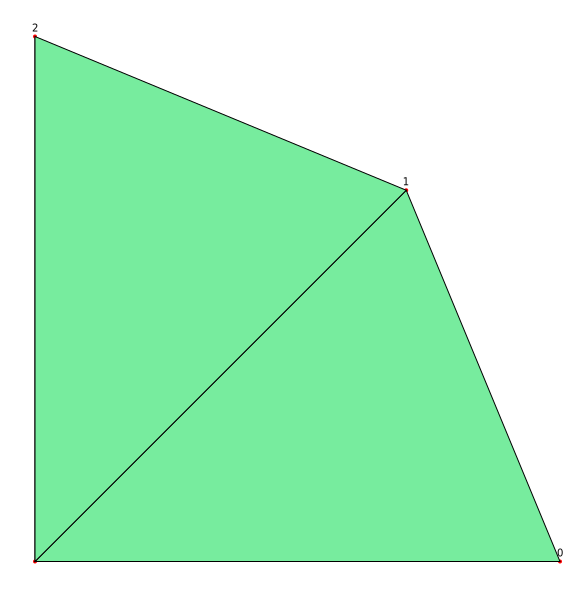

In [84]:
X = blowup_on_ith_minimal_torus_orbit(NormalToricVariety(Σ0), 1)
visualize(fan(X))

Let us verify that it is smooth, normal, and not projective. 

In [86]:
[issmooth(X) isnormal(X) isprojective(X)]

1×3 Matrix{Bool}:
 1  1  0

We compute some divisor groups associated to the projective plane $\mathbb{P}^2$.

In [87]:
P2 = toric_projective_space(2)
D = torusinvariant_prime_divisors(P2)
D[1]

A torus invariant divisor on a normal toric variety

Here's what doesn't work: 

In [88]:
4*D[1] + 2*D[2] + 3*D[3]

LoadError: MethodError: no method matching *(::Int64, ::ToricDivisor)
[0mClosest candidates are:
[0m  *(::Any, ::Any, [91m::Any[39m, [91m::Any...[39m) at operators.jl:560
[0m  *(::T, [91m::T[39m) where T<:Union{Int128, Int16, Int32, Int64, Int8, UInt128, UInt16, UInt32, UInt64, UInt8} at int.jl:88
[0m  *(::Union{Int16, Int32, Int64, Int8}, [91m::BigInt[39m) at gmp.jl:541
[0m  ...

The correct way of consructing torus invariant divisors is: 

In [89]:
DD = ToricDivisor(P2, [4,2,3])

A torus invariant divisor on a normal toric variety

In [90]:
[iscartier(DD) isprincipal(DD)]

1×2 Matrix{Bool}:
 1  0

Can you think of a divisor for which both checks return 'true'? How about both 'false'?

In [92]:
EE = ToricDivisor(P2, [4,2,-6])
[iscartier(EE) isprincipal(EE)]

1×2 Matrix{Bool}:
 1  1

We can ask for the coefficients of a torus invariant divisor:

In [93]:
coefficients(DD)

3-element Vector{Int64}:
 4
 2
 3

and compute its polyhedron:

In [94]:
P = polyhedron(DD)

A polyhedron in ambient dimension 2

In [97]:
isfeasible(P)

true

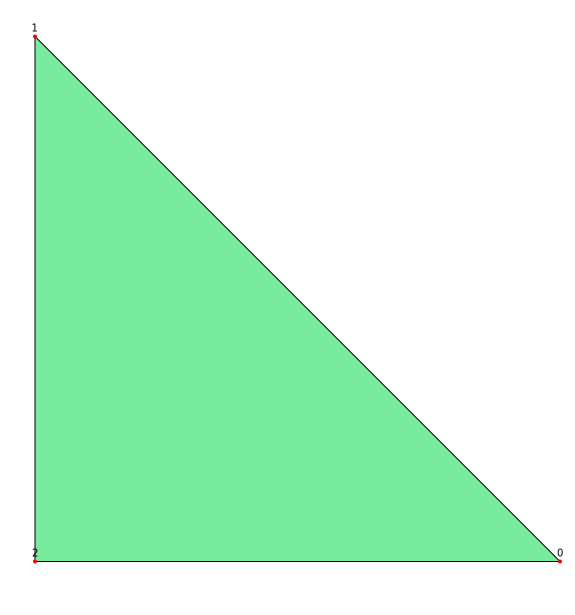

In [98]:
visualize(P)

We expect that 
$$ P =  \left \{(x_1,x_2)~ \Big |~ \begin{bmatrix}
    1 & 0 \\ 0 & 1 \\ -1 & -1
    \end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} + \begin{bmatrix} 4 \\ 2 \\ 3 \end{bmatrix} \geq 0  \right \} $$

In [99]:
facets(P)

3-element SubObjectIterator{AffineHalfspace}:
 The Halfspace of R^2 described by
1: -x₁ ≦ 4

 The Halfspace of R^2 described by
1: -x₂ ≦ 2

 The Halfspace of R^2 described by
1: x₁ + x₂ ≦ 3


In [100]:
ClP2 = class_group(P2)

(General) abelian group with relation matrix
[0 0 0; 0 0 0; 0 0 0; 1 0 -1; 0 1 -1]

In [101]:
picard_group(P2)

GrpAb: Z

Now let's do a different example:

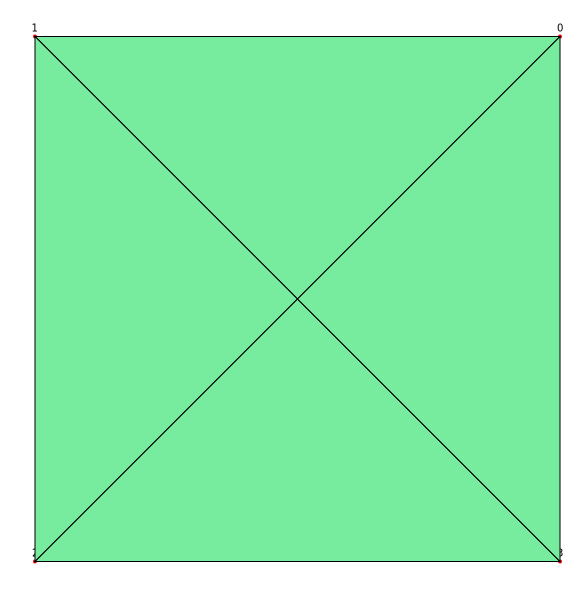

In [102]:
R = [1 1; -1 1; -1 -1; 1 -1]
IM = IncidenceMatrix([[1,2],[2,3],[3,4],[4,1]])
Σ = PolyhedralFan(R,IM)
visualize(Σ)

In [103]:
X = NormalToricVariety(Σ)
Cl = class_group(X)
isfree(Cl)

false

Is the Picard group free?

In [104]:
Pic = picard_group(X)

GrpAb: Z^2

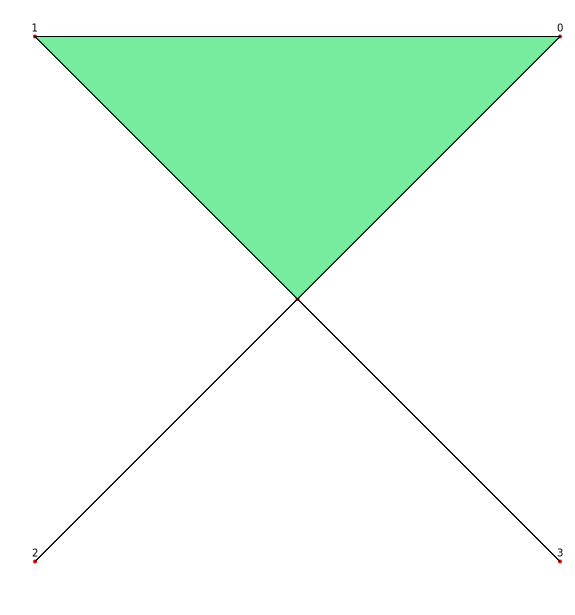

In [110]:
R = [1 1; -1 1; -1 -1; 1 -1]
IM = IncidenceMatrix([[1,2],[3],[4]])
Σ = PolyhedralFan(R,IM)
visualize(Σ)

In [112]:
X = NormalToricVariety(Σ)
Cl = class_group(X)
rays(Σ)

4-element SubObjectIterator{RayVector{Polymake.Rational}}:
 [1, 1]
 [-1, 1]
 [-1, -1]
 [1, -1]

In [113]:
picard_group(X)

GrpAb: Z^2